Full tutorial: https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=1s

https://youtu.be/qFJeN9V1ZsI?t=649

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    #The 5% of younger people who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #The 5% of older people who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    #The 95% of younger people who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95% of older people who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# Simple tf.keras Sequential Model
https://youtu.be/qFJeN9V1ZsI?t=1175

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
# physical_devices = tf.config.experimental.list_physical_devices("GPU")
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


https://youtu.be/qFJeN9V1ZsI?t=1518

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.5298 - accuracy: 0.7481 - val_loss: 0.3726 - val_accuracy: 0.9190
Epoch 2/30
189/189 - 0s - loss: 0.3188 - accuracy: 0.9249 - val_loss: 0.2755 - val_accuracy: 0.9571
Epoch 3/30
189/189 - 0s - loss: 0.2769 - accuracy: 0.9460 - val_loss: 0.2560 - val_accuracy: 0.9571
Epoch 4/30
189/189 - 0s - loss: 0.2684 - accuracy: 0.9397 - val_loss: 0.2434 - val_accuracy: 0.9524
Epoch 5/30
189/189 - 0s - loss: 0.2588 - accuracy: 0.9439 - val_loss: 0.2386 - val_accuracy: 0.9571
Epoch 6/30
189/189 - 0s - loss: 0.2536 - accuracy: 0.9444 - val_loss: 0.2305 - val_accuracy: 0.9524
Epoch 7/30
189/189 - 0s - loss: 0.2515 - accuracy: 0.9434 - val_loss: 0.2267 - val_accuracy: 0.9524
Epoch 8/30
189/189 - 0s - loss: 0.2494 - accuracy: 0.9450 - val_loss: 0.2291 - val_accuracy: 0.9571
Epoch 9/30
189/189 - 0s - loss: 0.2485 - accuracy: 0.9481 - val_loss: 0.2223 - val_accuracy: 0.9524
Epoch 10/30
189/189 - 0s - loss: 0.2465 - accuracy: 0.9466 - val_loss: 0.2215 - val_accuracy: 0.9571

https://youtu.be/qFJeN9V1ZsI?t=2390

# Preprocess test data

In [12]:
test_labels = []
test_samples = []

In [13]:
for i in range(10):
    #The 5% of younger people who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #The 5% of older people who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    #The 95% of younger people who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #The 95% of older people who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [14]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [15]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

# Predict

In [16]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) #same batch as when training

In [17]:
print("no side effects\tside effects")
for i in predictions:
    print(i)

no side effects	side effects
[0.41983926 0.58016074]
[0.05878727 0.9412127 ]
[0.9537421  0.04625787]
[0.15098825 0.8490118 ]
[0.9531155  0.04688451]
[0.01622265 0.9837773 ]
[0.10838258 0.8916175 ]
[0.95371896 0.04628106]
[0.95369565 0.04630427]
[0.01344992 0.9865501 ]
[0.10838258 0.8916175 ]
[0.21554595 0.78445405]
[0.08372761 0.91627234]
[0.09132028 0.9086798 ]
[0.95369565 0.04630427]
[0.30839682 0.6916031 ]
[0.01477234 0.9852277 ]
[0.95369565 0.04630427]
[0.04094402 0.9590559 ]
[0.8338729  0.16612713]
[0.02355704 0.976443  ]
[0.02835348 0.9716465 ]
[0.95392734 0.04607273]
[0.8875679 0.1124322]
[0.9355096  0.06449042]
[0.1179232  0.88207686]
[0.30839682 0.6916031 ]
[0.9534631  0.04653693]
[0.9531884  0.04681161]
[0.01622265 0.9837773 ]
[0.95383483 0.04616521]
[0.94479096 0.05520909]
[0.01224441 0.9877556 ]
[0.17702699 0.8229731 ]
[0.08372761 0.91627234]
[0.9538579  0.04614207]
[0.16359127 0.8364088 ]
[0.9539734  0.04602654]
[0.95383483 0.04616521]
[0.02835348 0.9716465 ]
[0.9537653  0

In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [19]:
for i in rounded_predictions:
    print(i)

1
1
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
0
1
1
1
0
1
0
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1


### Plot Confusion Matrix with test labels
https://youtu.be/qFJeN9V1ZsI?t=2890

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


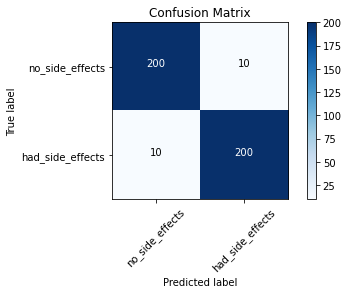

In [23]:
cm_plot_labels = ["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

### Save and load model
https://youtu.be/qFJeN9V1ZsI?t=3172 

#### 1.model.save

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.get_weights()

[array([[-0.00884149, -0.54614323,  0.62215835, -0.55126345,  0.3493624 ,
          0.1757171 , -0.09576253,  0.50824016,  0.67877924,  0.5016687 ,
         -0.14502218, -0.10050616, -0.26070157, -0.0603106 ,  0.4788144 ,
         -0.38691127]], dtype=float32),
 array([ 0.10321642,  0.        , -0.31613904,  0.        , -0.1876428 ,
         0.1390905 ,  0.13276151, -0.2715005 , -0.29113382, -0.2630016 ,
         0.        ,  0.        ,  0.        ,  0.        , -0.2520013 ,
         0.        ], dtype=float32),
 array([[-8.89456645e-02,  4.56299260e-02,  2.12545529e-01,
          4.23081994e-01,  2.88601100e-01, -2.58568704e-01,
         -1.99893922e-01,  4.63267379e-02,  1.52209923e-01,
         -2.39479586e-01,  1.75724059e-01,  1.49814472e-01,
         -1.48801729e-01, -1.68003634e-01,  4.20273334e-01,
         -1.32350828e-02,  1.43355578e-01, -3.37978229e-02,
         -3.19190711e-01, -2.91137993e-02, -1.88022658e-01,
         -3.09036523e-01,  2.39010468e-01, -1.69184268e-01,
 

In [24]:
#Check first if file exists already
#If not, save model
import os.path
if os.path.isfile("models/medical_trial_model.h5") is False:
    model.save("models/medical_trial_model.h5")

This save function saves:
    The architecture of the model
    The weights
    The training config(loss, optimizer)
    The state of the optimizer, allowing to resume training where we left off

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model("models/medical_trial_model.h5")

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
new_model.get_weights()

[array([[-0.00884149, -0.54614323,  0.62215835, -0.55126345,  0.3493624 ,
          0.1757171 , -0.09576253,  0.50824016,  0.67877924,  0.5016687 ,
         -0.14502218, -0.10050616, -0.26070157, -0.0603106 ,  0.4788144 ,
         -0.38691127]], dtype=float32),
 array([ 0.10321642,  0.        , -0.31613904,  0.        , -0.1876428 ,
         0.1390905 ,  0.13276151, -0.2715005 , -0.29113382, -0.2630016 ,
         0.        ,  0.        ,  0.        ,  0.        , -0.2520013 ,
         0.        ], dtype=float32),
 array([[-8.89456645e-02,  4.56299260e-02,  2.12545529e-01,
          4.23081994e-01,  2.88601100e-01, -2.58568704e-01,
         -1.99893922e-01,  4.63267379e-02,  1.52209923e-01,
         -2.39479586e-01,  1.75724059e-01,  1.49814472e-01,
         -1.48801729e-01, -1.68003634e-01,  4.20273334e-01,
         -1.32350828e-02,  1.43355578e-01, -3.37978229e-02,
         -3.19190711e-01, -2.91137993e-02, -1.88022658e-01,
         -3.09036523e-01,  2.39010468e-01, -1.69184268e-01,
 

In [35]:
new_model.optimizer

#### 2.model.to_json

In [36]:
#save as json
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [37]:
#load from json
#DOES NOT SAVE WEIGHTS
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [38]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
